In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_excel(r"F:\6th_semester\Neural\Dry_Bean_Dataset.xlsx")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,roundnes,Class
0,114004,1279.356,451.361256,323.747996,0.875280,BOMBAY
1,117034,1265.926,425.923787,351.215109,0.917710,BOMBAY
2,126503,1326.959,475.772459,339.381887,0.902809,BOMBAY
3,128118,1360.135,504.024964,NaN,0.870274,BOMBAY
4,129409,1348.888,484.364424,341.172659,0.893763,BOMBAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             150 non-null    int64  
 1   Perimeter        150 non-null    float64
 2   MajorAxisLength  150 non-null    float64
 3   MinorAxisLength  149 non-null    float64
 4   roundnes         150 non-null    float64
 5   Class            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data['MinorAxisLength'].fillna(value=data['MinorAxisLength'].mean(), inplace=True)

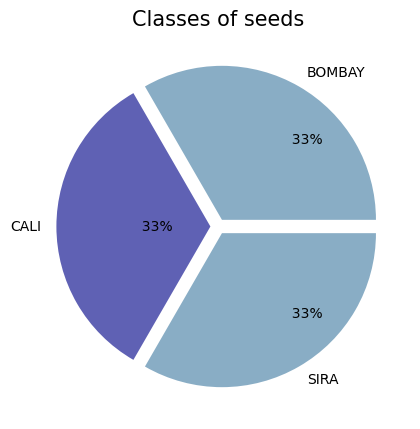

In [6]:
labels = ['BOMBAY','CALI','SIRA']
u = [data['Class'].value_counts()[0],data['Class'].value_counts()[1],data['Class'].value_counts()[2]]
figure,axis = plt.subplots(figsize = (10,5))
axis.pie(u,labels = labels,explode = [0.05]*3,autopct='%20.0f%%',colors = sns.color_palette('twilight')[0:2])
plt.title('Classes of seeds',fontsize = 15)
plt.show()

array([[<Axes: title={'center': 'BOMBAY'}>,
        <Axes: title={'center': 'CALI'}>],
       [<Axes: title={'center': 'SIRA'}>, <Axes: >]], dtype=object)

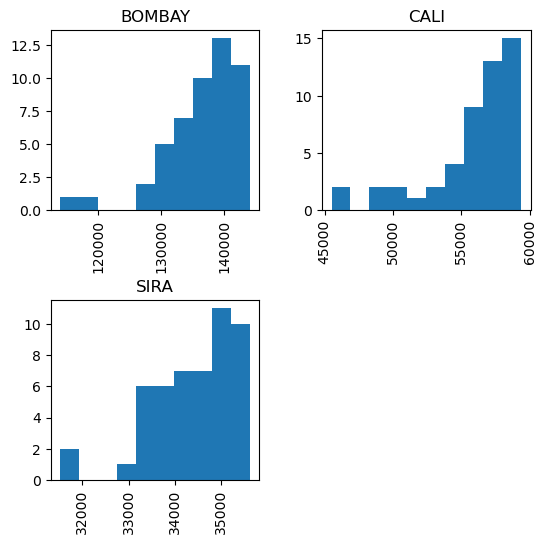

In [7]:
data.hist(column='Area',by='Class',figsize=(6,6))

array([[<Axes: title={'center': 'BOMBAY'}>,
        <Axes: title={'center': 'CALI'}>],
       [<Axes: title={'center': 'SIRA'}>, <Axes: >]], dtype=object)

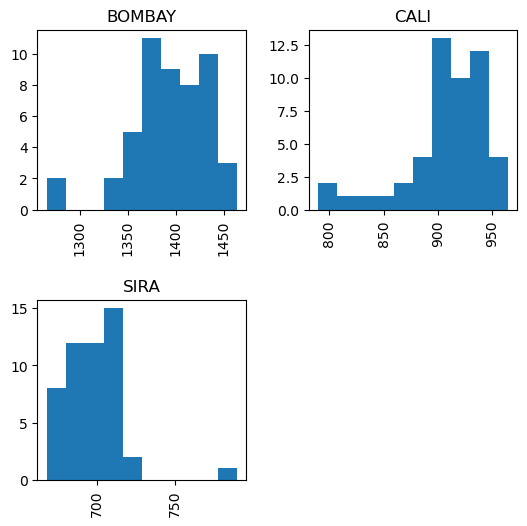

In [8]:
data.hist(column='Perimeter',by='Class',figsize=(6,6))

array([[<Axes: title={'center': 'BOMBAY'}>,
        <Axes: title={'center': 'CALI'}>],
       [<Axes: title={'center': 'SIRA'}>, <Axes: >]], dtype=object)

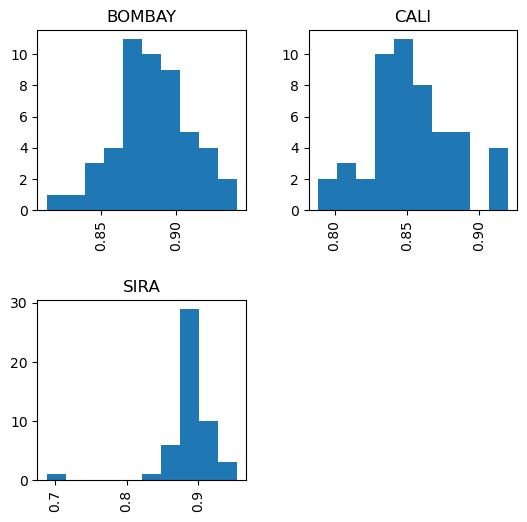

In [9]:
data.hist(column='roundnes',by='Class',figsize=(6,6))

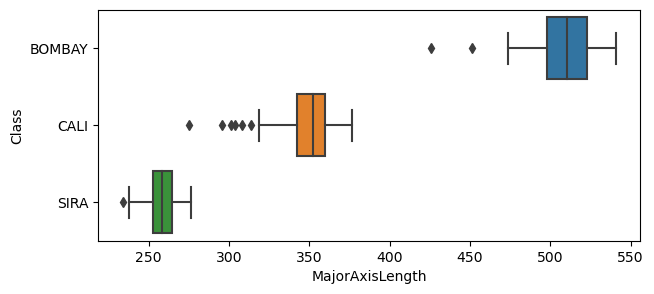

In [10]:
plt.figure(figsize=(7,3))
sns.boxplot(x="MajorAxisLength", y="Class", data=data)
plt.show()

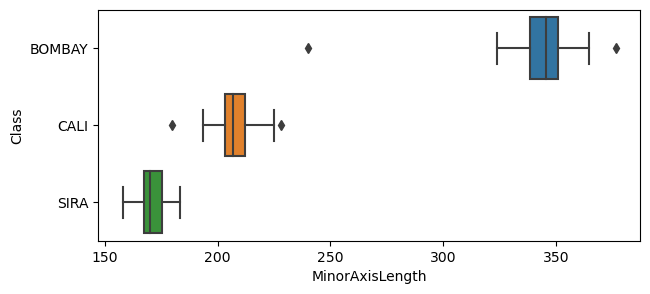

In [11]:
plt.figure(figsize=(7,3))
sns.boxplot(x="MinorAxisLength", y="Class", data=data)
plt.show()

In [12]:
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data['Class'])

Text(0.5, 1.0, 'Correlation Between Features')

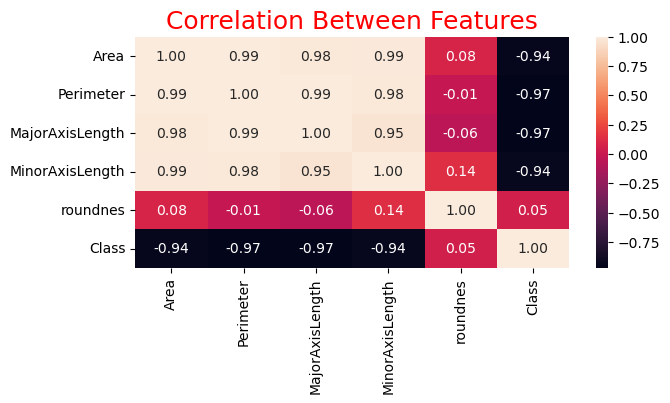

In [13]:
plt.figure(figsize=(7,3))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red")

In [14]:
def Split_my_data(choice):
    # C1 & C2
    if choice==1:
        x=data.iloc[:100,:-1]
        y=data.iloc[:100,-1]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=10)
    # C1 & C3
    elif choice==2:
        d1=data.iloc[:50,:]
        d2=data.iloc[100:150,:]
        d= pd.concat([d1, d2])
        x=data.iloc[:,:-1]
        y=data.iloc[:,-1]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=10)
    # C2 & C3
    elif choice==3:
        x=data.iloc[50:,:-1]
        y=data.iloc[50:,-1]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=10) 
    
    return x_train,x_test,y_train,y_test